In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
dataF = pd.read_csv('_All_Cities_Cleaned.csv')

In [4]:
dataF.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,city
0,OWNER,2.0,BHK,Apartment,Bodakdev,20000.0,1450.0,Furnished,2.0,Ahmedabad
1,OWNER,1.0,RK,Studio Apartment,CG Road,7350.0,210.0,Semi-Furnished,1.0,Ahmedabad
2,OWNER,3.0,BHK,Apartment,Jodhpur,22000.0,1900.0,Unfurnished,3.0,Ahmedabad
3,OWNER,2.0,BHK,Independent House,Sanand,13000.0,1285.0,Semi-Furnished,2.0,Ahmedabad
4,OWNER,2.0,BHK,Independent House,Navrangpura,18000.0,1600.0,Furnished,2.0,Ahmedabad


In [5]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193011 entries, 0 to 193010
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   seller_type    193011 non-null  object 
 1   bedroom        193011 non-null  float64
 2   layout_type    193011 non-null  object 
 3   property_type  193011 non-null  object 
 4   locality       193011 non-null  object 
 5   price          193011 non-null  float64
 6   area           193011 non-null  float64
 7   furnish_type   193011 non-null  object 
 8   bathroom       193011 non-null  float64
 9   city           193011 non-null  object 
dtypes: float64(4), object(6)
memory usage: 14.7+ MB


In [6]:
dataF.describe()

,bedroom,price,area,bathroom
count,193011.000000,1.930110e+05,193011.000000,193011.000000
mean,2.081679,4.433654e+04,1264.604468,2.059883
std,0.956901,9.195199e+04,1043.725561,0.934805
min,1.000000,1.200000e+03,3.000000,1.000000
25%,1.000000,1.300000e+04,650.000000,1.000000
50%,2.000000,2.100000e+04,1000.000000,2.000000
75%,3.000000,3.600000e+04,1440.000000,3.000000
max,15.000000,5.885000e+06,19800.000000,19.000000


In [7]:
dataF.columns

Index(['seller_type', 'bedroom', 'layout_type', 'property_type', 'locality',
       'price', 'area', 'furnish_type', 'bathroom', 'city'],
      dtype='object')

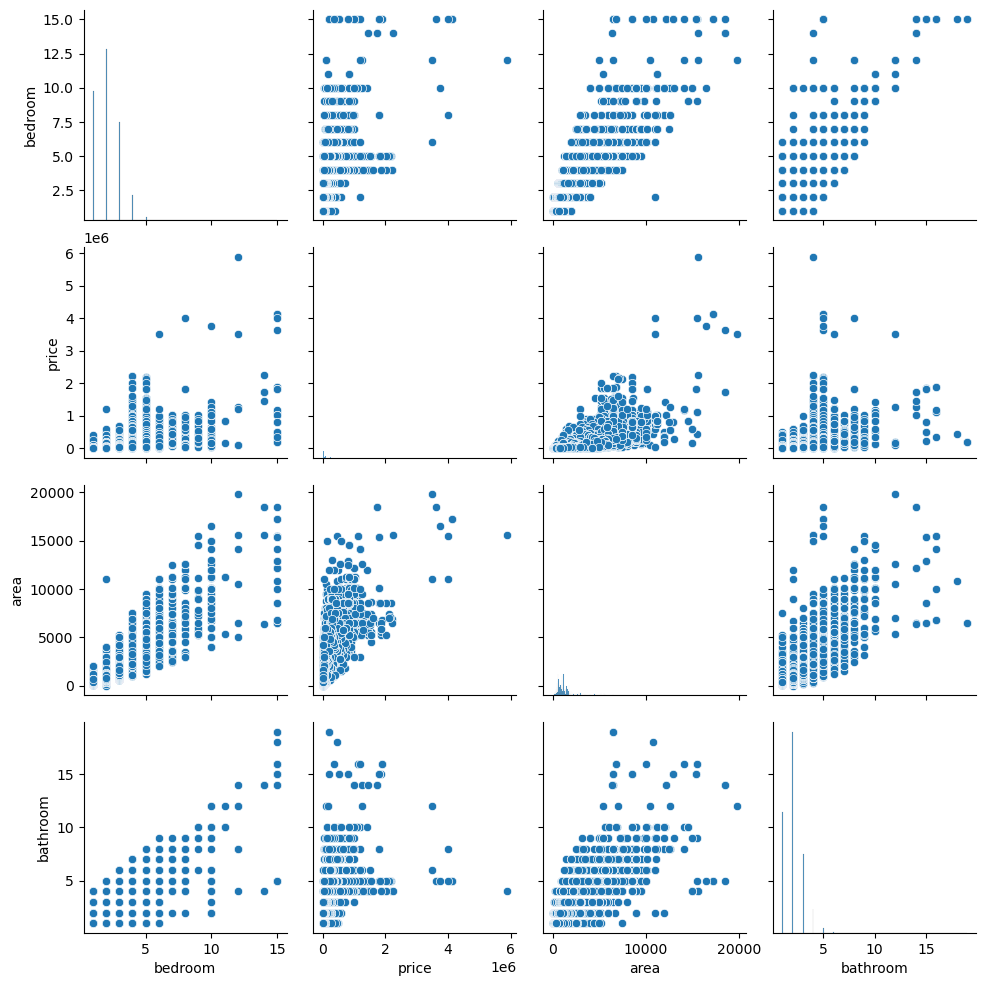

In [8]:
sns.pairplot(dataF)

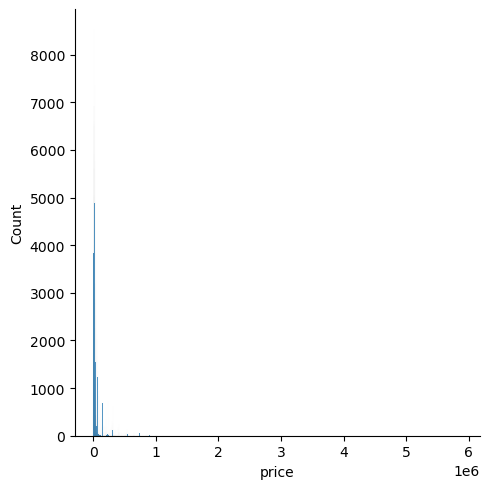

In [9]:
sns.displot(dataF['price'])

<AxesSubplot:>

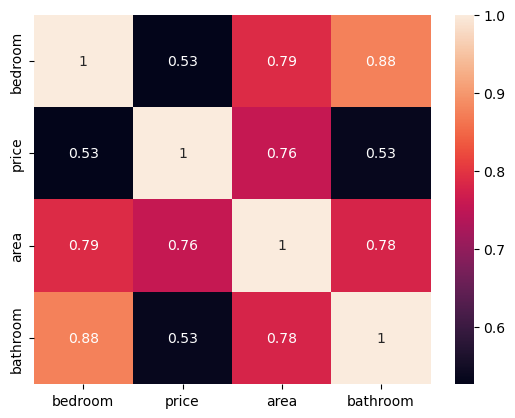

In [10]:
sns.heatmap(dataF.corr(), annot=True)

In [11]:
X = dataF[[ 'bedroom', 'area', 'bathroom' ]]
y = dataF['price']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [14]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [18]:
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
print(lr.intercept_)

-18370.384640213815


In [20]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient']) 
coeff_df

,Coefficient
bedroom,-15272.100663
area,80.419404
bathroom,-3533.402528


In [22]:
predictions = lr.predict(X_test)

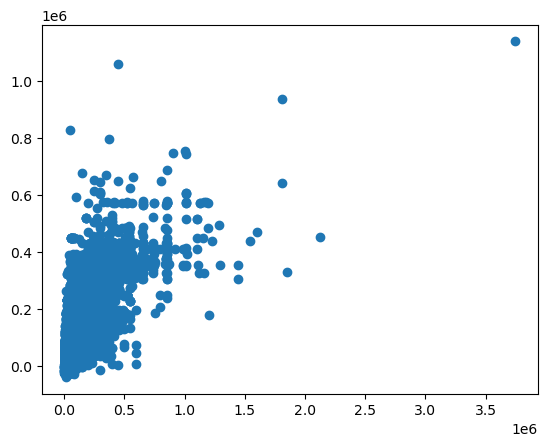

In [23]:
plt.scatter(y_test,predictions)

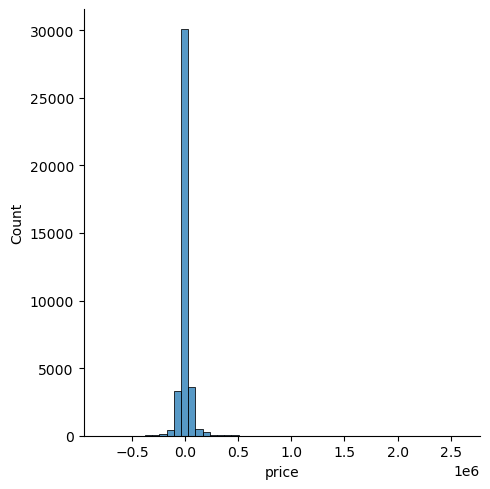

In [24]:
sns.displot((y_test-predictions), bins= 50);

In [25]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) 

MAE: 28250.276337929303
MSE: 3201307691.690239
RMSE: 56580.09978508556
